In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
df = pd.read_csv('C:\\Users\\sunil kumar\\Downloads\\2_option\\smartphones.csv')

In [5]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [27]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os', 'display_size', 'camera_total_mp',
       'clock_speed'],
      dtype='object')

In [7]:
df.dropna(inplace=True)

In [13]:
import re

# Extract digits using regex
df['ram'] = df['ram'].astype(str).apply(lambda x: re.findall(r'\d+', x)[0] if re.findall(r'\d+', x) else np.nan).astype(float)

In [16]:
import re
import numpy as np

def extract_first_number(s):
    match = re.findall(r'\d+\.?\d*', str(s))  # captures both integers and floats
    return float(match[0]) if match else np.nan

# Apply to battery column
df['battery'] = df['battery'].apply(extract_first_number).astype(float)

In [20]:
import re

# Extract numeric value before the word 'inch' or 'inches'
df['display_size'] = df['display'].astype(str).str.extract(r'([\d.]+)\s*inch')
df['display_size'] = df['display_size'].astype(float)

In [22]:
import re

def extract_camera_total(camera_string):
    numbers = re.findall(r'\d+', camera_string)
    return sum(map(int, numbers))

df['camera_total_mp'] = df['camera'].astype(str).apply(extract_camera_total)

In [25]:
import pandas as pd

# Sample data
df['processor'] = df['processor'].astype(str)

# Extract the float number before "Processor" (e.g., 3.2 GHz)
df['clock_speed'] = df['processor'].str.extract(r'([\d.]+)\s*(?=\s*Processor)')
df['clock_speed'] = df['clock_speed'].astype(float)

In [33]:
# Clean string-based numeric features
df['price'] = df['price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean categorical/text columns
df['os'] = df['os'].astype(str).str.strip()



In [34]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,display_size,camera_total_mp,clock_speed
0,OnePlus 11 5G,54999.0,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12.0,5000.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,6.70,146,NaN
1,OnePlus Nord CE 2 Lite 5G,19989.0,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6.0,5000.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6.59,84,NaN
2,Samsung Galaxy A14 5G,16499.0,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor",4.0,5000.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,6.60,67,NaN
3,Motorola Moto G62 5G,14999.0,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6.0,5000.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6.55,76,NaN
4,Realme 10 Pro Plus,24999.0,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor",6.0,5000.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,6.70,134,NaN


In [37]:
df['clock_speed'].values
df.drop(columns=['clock_speed'], inplace=True)

In [38]:
df['os'].value_counts()

os
Android v12                           264
Android v11                           224
No FM Radio                           161
Android v10                            49
Android v13                            42
Bluetooth                              29
Android v9.0 (Pie)                     25
Android v10.0                          20
iOS v16                                14
iOS v15                                10
Android v8.1 (Oreo)                     6
Memory Card Not Supported               4
Android v8.0 (Oreo)                     4
iOS v15.0                               3
Android v11.0                           3
iOS v13                                 3
Memory Card Supported, upto 256 GB      2
EMUI v12                                2
iOS v12.3                               1
iOS v13.0                               1
Android v4.4.2 (KitKat)                 1
Android v5.1.1 (Lollipop)               1
Hongmeng OS v3.0                        1
iOS v17                        

In [39]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,display_size,camera_total_mp
0,OnePlus 11 5G,54999.0,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",12.0,5000.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,6.70,146
1,OnePlus Nord CE 2 Lite 5G,19989.0,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6.0,5000.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6.59,84
2,Samsung Galaxy A14 5G,16499.0,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor",4.0,5000.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,6.60,67
3,Motorola Moto G62 5G,14999.0,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",6.0,5000.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6.55,76
4,Realme 10 Pro Plus,24999.0,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor",6.0,5000.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,6.70,134


Price Distribution

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_16544\1452973345.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_segment', order=order, palette='pastel', edgecolor='black')


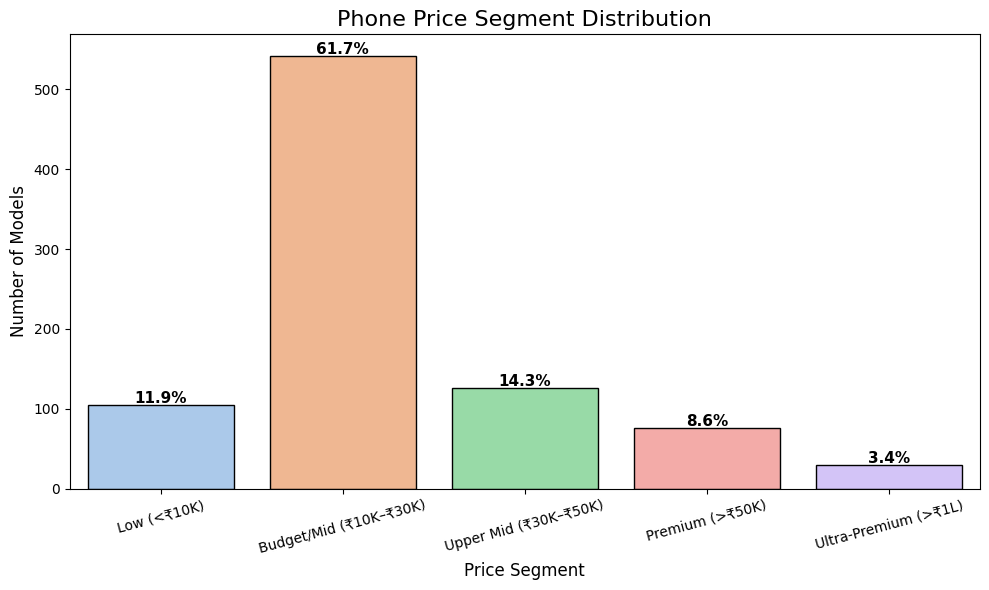

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def segment_price(price):
    if price < 10000:
        return 'Low (<₹10K)'
    elif 10000 <= price <= 30000:
        return 'Budget/Mid (₹10K–₹30K)'
    elif 30000 < price <= 50000:
        return 'Upper Mid (₹30K–₹50K)'
    elif 50000 < price <= 100000:
        return 'Premium (>₹50K)'
    else:
        return 'Ultra-Premium (>₹1L)'

df['price_segment'] = df['price'].apply(segment_price)

# Step 2: Plot distribution of price segments
plt.figure(figsize=(10,6))
order = ['Low (<₹10K)', 'Budget/Mid (₹10K–₹30K)', 'Upper Mid (₹30K–₹50K)', 
         'Premium (>₹50K)', 'Ultra-Premium (>₹1L)']
sns.countplot(data=df, x='price_segment', order=order, palette='pastel', edgecolor='black')

# Add percentages on bars
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    plt.text(p.get_x() + p.get_width() / 2., height + 2, percentage,
             ha='center', fontsize=11, fontweight='bold')

# Titles and labels
plt.title('Phone Price Segment Distribution', fontsize=16)
plt.xlabel('Price Segment', fontsize=12)
plt.ylabel('Number of Models', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [44]:
avg_specs = df.groupby('price_segment').agg({
    'ram': 'mean',
    'battery': 'mean'
}).round(1).reset_index()

print(avg_specs)


            price_segment   ram  battery
0  Budget/Mid (₹10K–₹30K)   6.2   4960.4
1             Low (<₹10K)   3.6   4959.2
2         Premium (>₹50K)   8.8   4203.2
3    Ultra-Premium (>₹1L)  23.8   3600.4
4   Upper Mid (₹30K–₹50K)   9.0   4695.7


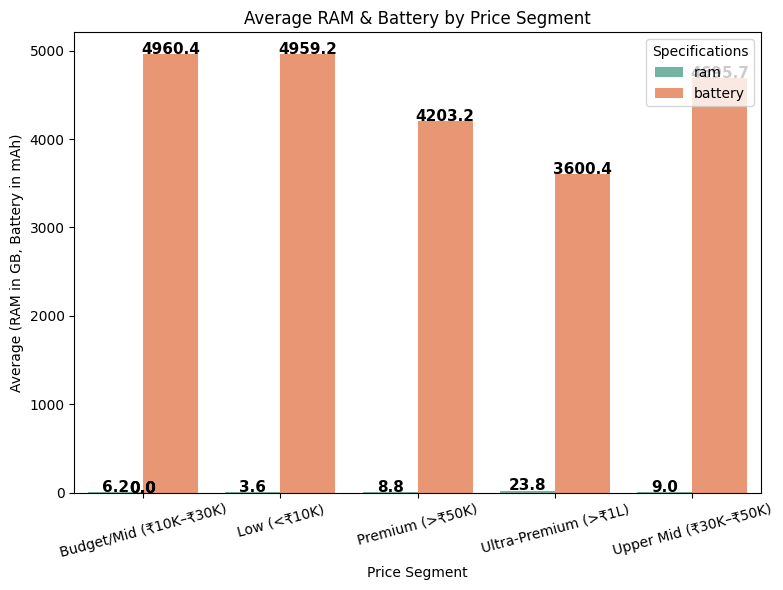

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_16544\3418782239.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_segment', y='ram', palette='Set2')


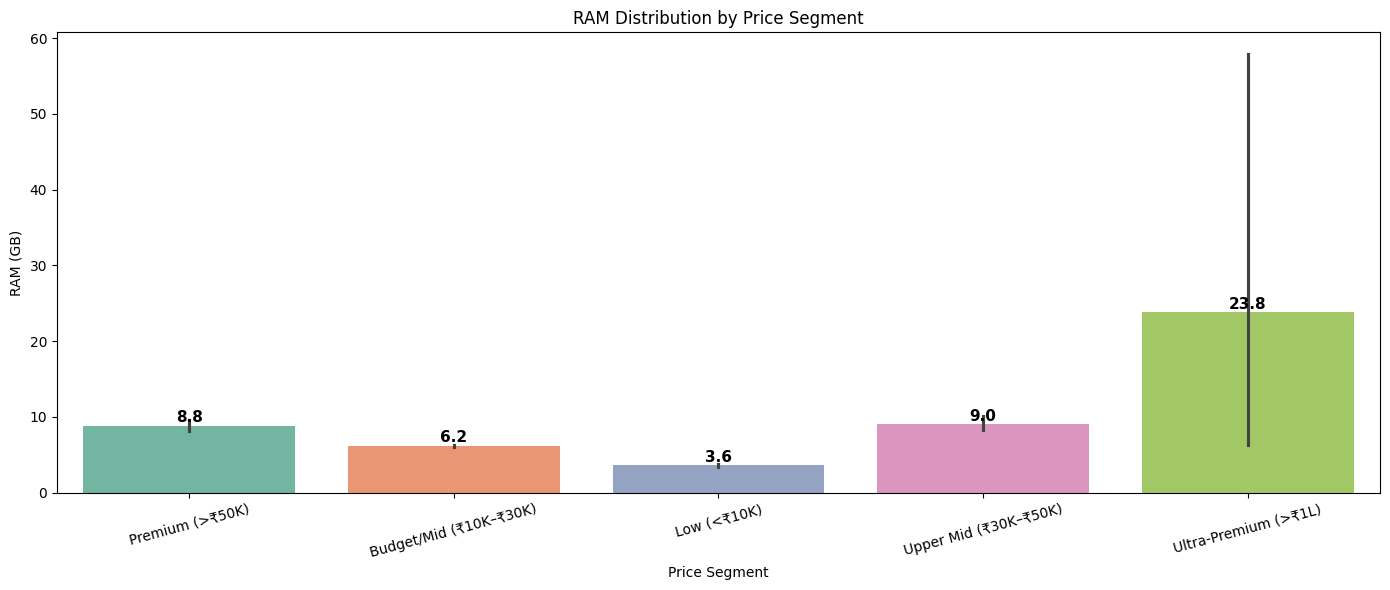

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_16544\3418782239.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_segment', y='battery', palette='Set2')


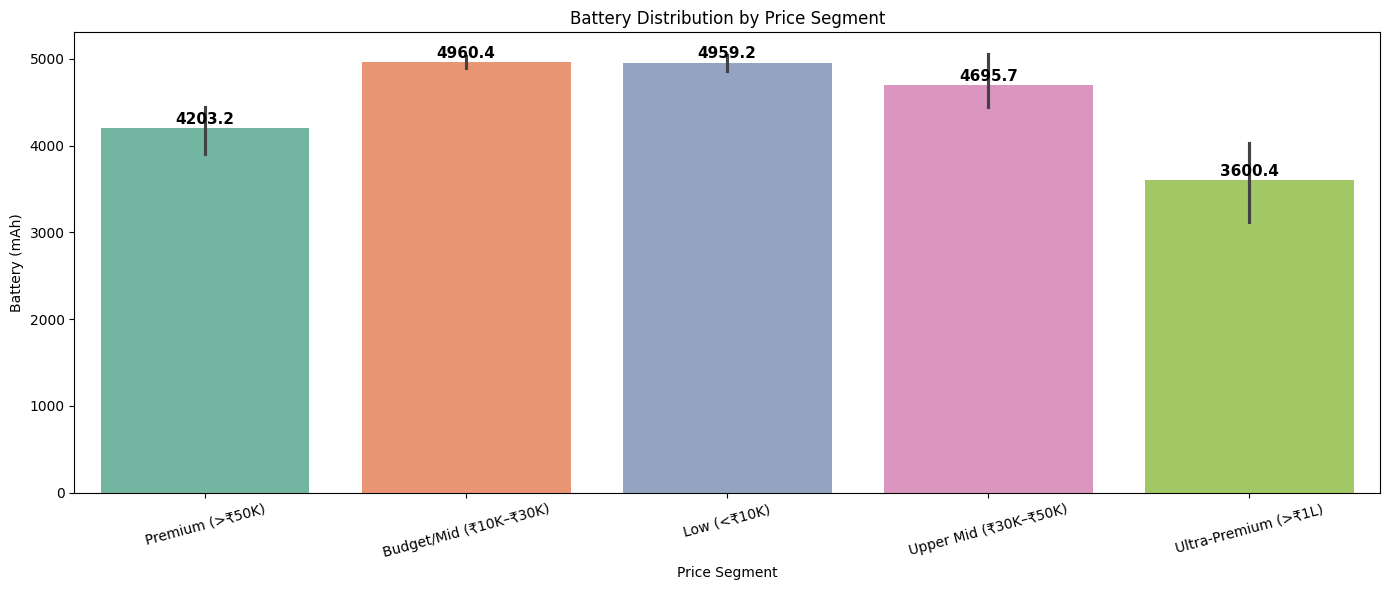

In [53]:
avg_specs_melted = avg_specs.melt(id_vars='price_segment', var_name='spec', value_name='average')
plt.figure(figsize=(8,6))
sns.barplot(data=avg_specs_melted, x='price_segment', y='average', hue='spec', palette='Set2')
# add percentage labels on bars
for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{height:.1f}'
    plt.text(p.get_x() + p.get_width() / 2., height + 0.5, percentage,
    ha='center', fontsize=11, fontweight='bold')

plt.xlabel('Price Segment')
plt.legend(title='Specifications', loc='upper right')
plt.title('Average RAM & Battery by Price Segment')
plt.ylabel('Average (RAM in GB, Battery in mAh)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# Step 4: Plotting the distribution of RAM and Battery by Price Segment
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='price_segment', y='ram', palette='Set2')
# add percentage labels on bars
for p in plt.gca().patches:
    height=p.get_height()
    percentage= f'{height:.1f}'
    plt.text(p.get_x() + p.get_width() / 2., height + 0.5, percentage,
    ha='center', fontsize=11, fontweight='bold')
    
plt.title('RAM Distribution by Price Segment')
plt.ylabel('RAM (GB)')
plt.xlabel('Price Segment')
plt.xticks(rotation=15)
plt.tight_layout()  
plt.show()

# Step 5: Plotting the distribution of Battery by Price Segment
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='price_segment', y='battery', palette='Set2')
# add percentage labels on bars
for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{height:.1f}'
    plt.text(p.get_x() + p.get_width() / 2., height + 50, percentage,
    ha='center', fontsize=11, fontweight='bold')
    
plt.title('Battery Distribution by Price Segment')
plt.ylabel('Battery (mAh)')
plt.xlabel('Price Segment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

              price_segment                                         processor  \
18   Budget/Mid (₹10K–₹30K)    Dimensity 700 5G, Octa Core, 2.2 GHz Processor   
129  Budget/Mid (₹10K–₹30K)      Snapdragon 680, Octa Core, 2.4 GHz Processor   
132  Budget/Mid (₹10K–₹30K)      Snapdragon 695, Octa Core, 2.2 GHz Processor   
183             Low (<₹10K)           Helio P35, Octa Core, 2.3 GHz Processor   
174             Low (<₹10K)           Helio G35, Octa Core, 2.3 GHz Processor   
173             Low (<₹10K)             Helio G25, Octa Core, 2 GHz Processor   
242         Premium (>₹50K)   Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor   
216         Premium (>₹50K)         Bionic A15, Hexa Core, 3.22 GHz Processor   
243         Premium (>₹50K)  Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor   
249    Ultra-Premium (>₹1L)                  Bionic  A16, Hexa Core Processor   
252    Ultra-Premium (>₹1L)         Bionic A15, Hexa Core, 3.22 GHz Processor   
259    Ultra-Premium (>₹1L) 

ValueError: 'bottom right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

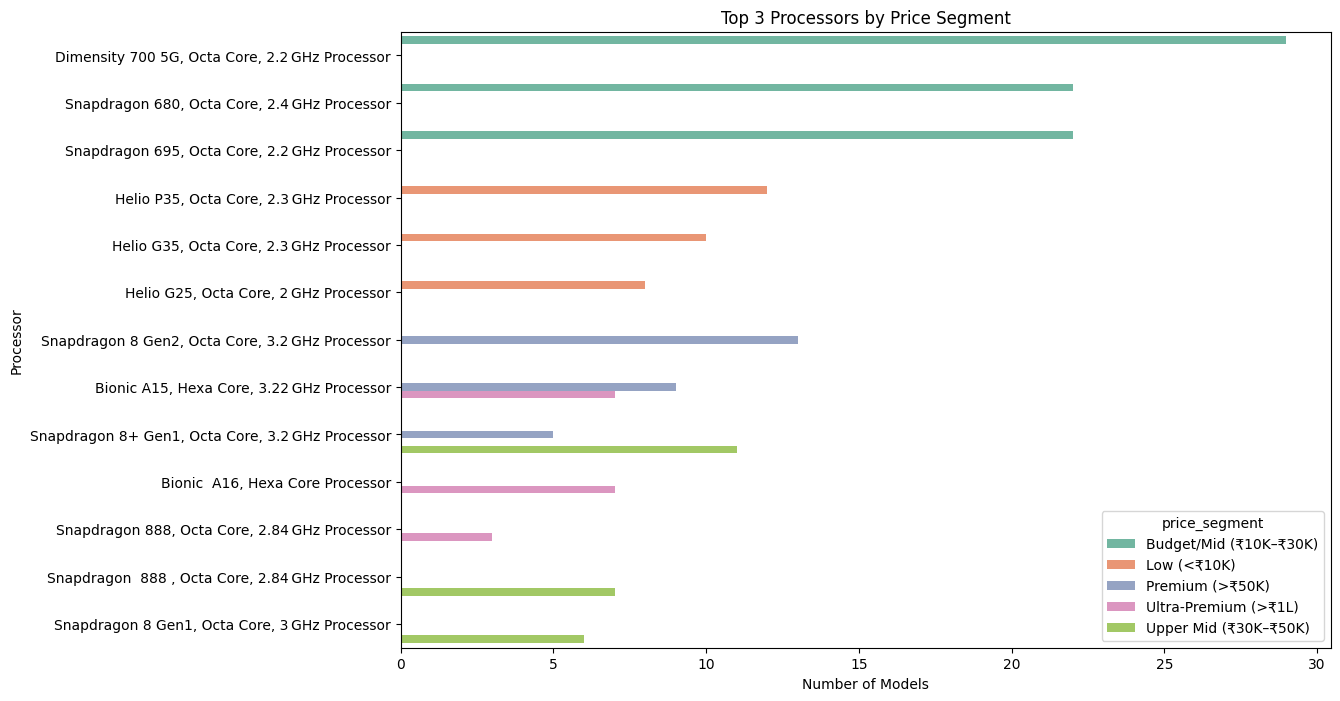

In [57]:
top_processors = (df.groupby(['price_segment', 'processor'])
                    .size()
                    .reset_index(name='count'))

top_by_segment = (top_processors.sort_values(['price_segment', 'count'], 
                                             ascending=[True, False])
                                .groupby('price_segment')
                                .head(3))
print(top_by_segment)

# make the plot top processors by price segment
plt.figure(figsize=(12, 8))
sns.barplot(data=top_by_segment, x='count', y='processor', hue='price_segment', palette='Set2')
plt.title('Top 3 Processors by Price Segment')
plt.xlabel('Number of Models')
plt.ylabel('Processor')
plt.legend(title='Price Segment', loc='bottom right')
plt.tight_layout()
plt.show()

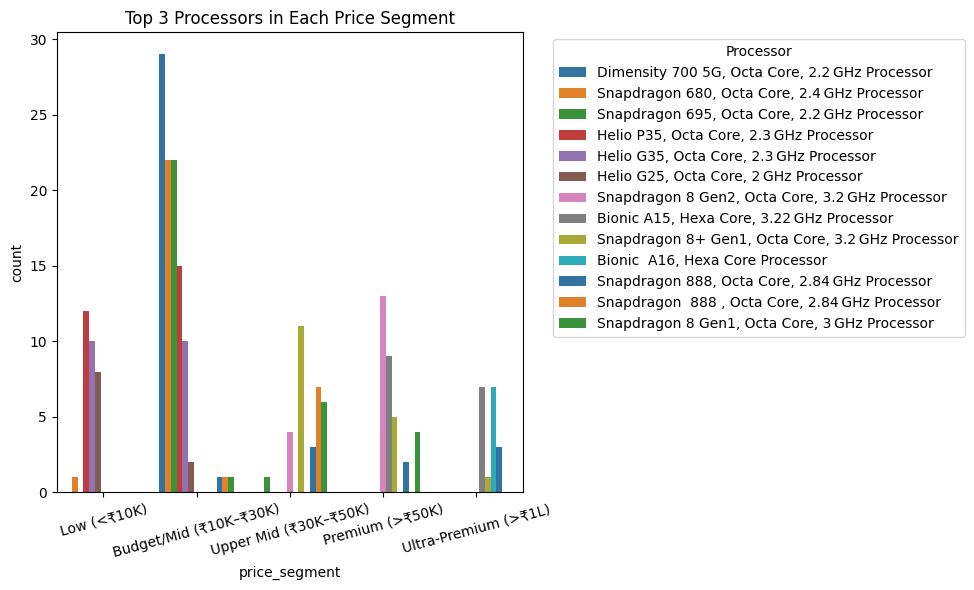

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='price_segment', hue='processor',
              order=order, 
              hue_order=top_by_segment['processor'].unique(),
              palette='tab10')
plt.title('Top 3 Processors in Each Price Segment')
plt.xticks(rotation=15)
plt.legend(title='Processor', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [60]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os', 'display_size', 'camera_total_mp',
       'price_segment'],
      dtype='object')

In [61]:
comparison =df.groupby('price_segment').agg({
    'rating':'mean',
    'camera_total_mp':'mean',
    'battery':'mean',
    'display_size':'mean',
    
}).round(1).reset_index()
print(comparison)

            price_segment  rating  camera_total_mp  battery  display_size
0  Budget/Mid (₹10K–₹30K)    78.2             77.6   4960.4           6.5
1             Low (<₹10K)    65.6             28.4   4959.2           6.5
2         Premium (>₹50K)    84.7             79.0   4203.2           6.5
3    Ultra-Premium (>₹1L)    81.2             56.5   3600.4           6.6
4   Upper Mid (₹30K–₹50K)    84.3            100.0   4695.7           6.6


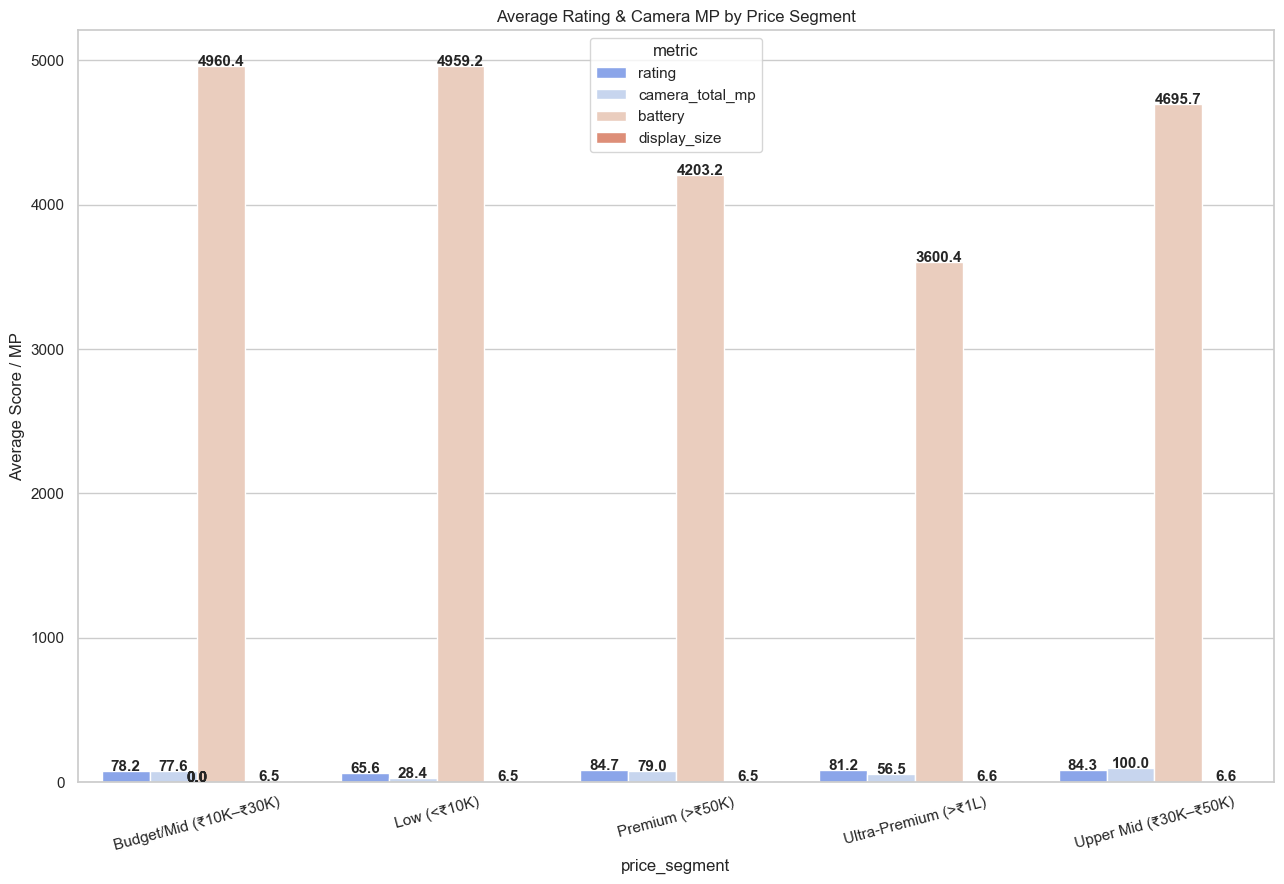

In [67]:
# need to bar color improment needs to be improved
import seaborn as sns

sns.set(style='whitegrid')

comp_melted = comparison.melt(id_vars='price_segment', var_name='metric', value_name='value')
plt.figure(figsize=(13,9))
sns.barplot(data=comp_melted, x='price_segment', y='value', hue='metric', palette='coolwarm',color='skyblue')
for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{height:.1f}'
    plt.text(p.get_x() + p.get_width() / 2., height + 0.5, percentage,
    ha='center', fontsize=11, fontweight='bold')
plt.title('Average Rating & Camera MP by Price Segment')
plt.ylabel('Average Score / MP')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [70]:
df['price'].values


array([ 54999.,  19989.,  16499.,  14999.,  24999.,  16999.,  65999.,
        29999.,  26749.,  28999.,  18999.,  18999.,  24762.,  16990.,
        62999.,   9999.,  45999.,  32999.,  14499.,  39999.,  35999.,
        14999.,  17859.,  42990.,  31239.,  21995., 129990.,  27999.,
        19999.,  20999.,  27990.,  38999.,  23790.,  39999.,  29990.,
        32999.,  28499.,  21999.,  19999.,  18999.,  27999.,  18499.,
        17478.,  11936.,   8950.,  12489.,  18999.,  29999.,  11990.,
        18999.,  13999.,  14965.,  74999.,  10999.,  84990.,  10499.,
        17990.,  29990.,  18499.,  16499.,  14999.,  35499.,  60999.,
        32999.,  15999.,   9499.,  27994.,  13989.,  44999.,  13999.,
       119900.,  27660.,  24999.,   8388.,  15999.,  20999.,  13999.,
        19990.,  13999.,  22999.,  22999.,  16999.,  14290.,  13489.,
        22990.,  16499.,   9999.,  12499.,  12499.,  59999.,  15990.,
       119990.,  19999.,  23990.,  12999.,  19990.,  43999.,  49999.,
        15999.,  369

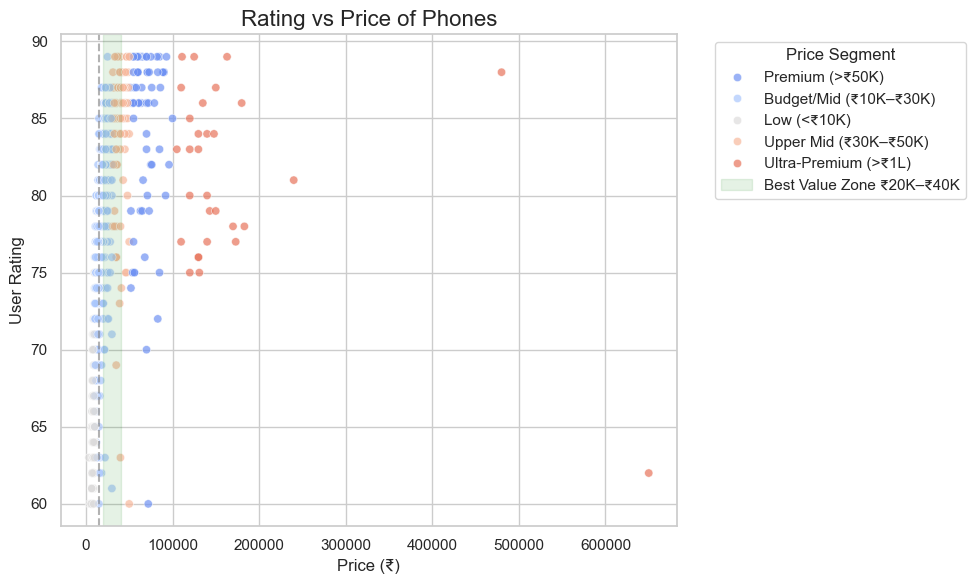

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='rating', hue='price_segment', palette='coolwarm', alpha=0.7)

# Plot enhancements
plt.title('Rating vs Price of Phones', fontsize=16)
plt.xlabel('Price (₹)', fontsize=12)
plt.ylabel('User Rating', fontsize=12)
plt.axvspan(20000, 40000, color='green', alpha=0.1, label='Best Value Zone ₹20K–₹40K')
plt.axvline(15000, color='gray', linestyle='--', alpha=0.6)
plt.legend(title='Price Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


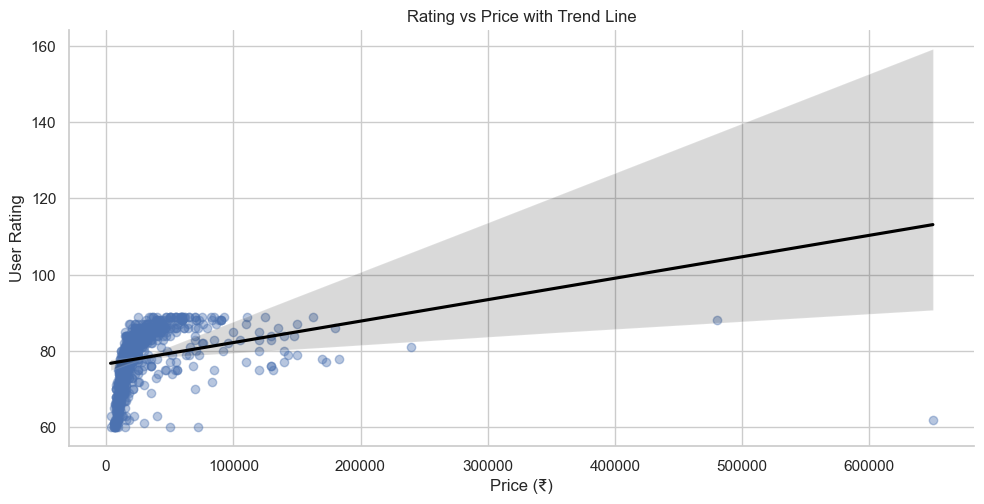

In [71]:
sns.lmplot(data=df, x='price', y='rating', aspect=2, scatter_kws={'alpha':0.4}, line_kws={'color': 'black'})
plt.title('Rating vs Price with Trend Line')
plt.xlabel('Price (₹)')
plt.ylabel('User Rating')
plt.show()


#### price doesn’t correlate perfectly with rating, 